In [1]:
import scvi

AttributeError: module 'numpy' has no attribute 'ndarray'

In [ ]:
import tempfile


import scanpy as sc
import scvi
import seaborn as sns
import torch

In [18]:
import numpy as np

In [6]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = '/home/data/sdzl14/NSCLC/zong/fig/'

In [21]:
ad = sc.read_h5ad('/home/data/sdzl14/NSCLC/Peng_Zhang_2024/scRNA_annotated.h5ad')

In [3]:
ad = sc.read_h5ad('/home/data/sdzl14/NSCLC/Peng_Zhang_2024/scRNA_annotated.h5ad')
ad1 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Peilin_Wang_2025/scRNA_annotated.h5ad')
ad2 = sc.read_h5ad('/home/data/sdzl14/NSCLC/SDB_integrated/SDB_integrated.h5ad')
ad3 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Tagore_S_2025/Tagore_S_2025_integrated_data.h5ad')
ad4 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Ansuman_Satpathy_2023/Ansuman_Satpathy_2023_filtered.h5ad')
ad
ad1
ad2
ad3
ad4

AnnData object with n_obs × n_vars = 189180 × 25282
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'sample_colors'

In [58]:
ad2 = ad2.copy()
ad2.X = ad2.layers['raw_counts'].copy() 

In [61]:
keep_obs_columns = ['Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 
                    'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin']
ad2.obs = ad2.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad2.var = pd.DataFrame(index=ad2.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad2.obsm = {}

# 删除 layers 中的额外数据层
ad2.layers = {}
ad2.uns = {}
ad2.obsp = {}
ad2

AnnData object with n_obs × n_vars = 245726 × 17837
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin'

In [65]:
ad.obs['Pathtype'] = ad.obs['PathType']

In [66]:
ad = ad.copy()
ad.obs = ad.obs[keep_obs_columns].copy()
ad

AnnData object with n_obs × n_vars = 232080 × 31272
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin'

In [70]:
ad1.obs['Dataset'] = 'Peilin_Wang_2025'

In [71]:
ad1 = ad1.copy()
ad1.obs = ad1.obs[keep_obs_columns].copy()
ad1

AnnData object with n_obs × n_vars = 222012 × 36601
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin'

In [72]:
ad3 = ad3.copy()
ad3.obs = ad3.obs[keep_obs_columns].copy()
ad3

AnnData object with n_obs × n_vars = 256420 × 36601
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin'

In [76]:
ad4 = ad4.copy()
ad4.obs = ad4.obs[keep_obs_columns].copy()
ad4.var = pd.DataFrame(index=ad4.var.index)  
ad4.uns = {}
ad4

AnnData object with n_obs × n_vars = 189180 × 25282
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin'

In [77]:
print(ad.X.max(),ad1.X.max(),ad2.X.max(),ad3.X.max(),ad4.X.max())


30497.0 34991.0 6981040.0 10746.0 9255.0


In [109]:
adata = ad.concatenate(ad1,ad2, ad3, ad4, join="inner")

NameError: name 'ad' is not defined

In [80]:
adata.write_h5ad('/home/data/sdzl14/NSCLC/zong/un_integreted_data.h5ad')

In [110]:
adata= sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/un_integreted_data.h5ad')
adata = adata.copy()

In [111]:
adata

AnnData object with n_obs × n_vars = 1145418 × 16813
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine', 'batch'

In [112]:
adata.X.max()

np.float64(6981040.0)

In [30]:
new_var_names = pd.read_csv("/home/data/sdzl14/NSCLC/Peng_Zhang_2024/rownames.txt", usecols=[0]).iloc[:,0].values

new_var_names

array(['A1BG', 'A1BG-AS1', 'A1CF', ..., 'AC012100.2', 'DSCR4-IT1',
       'GAGE12H'], dtype=object)

In [31]:
ad.var_names = new_var_names

In [34]:
adata = ad.concatenate(ad1,ad2, ad3, ad4, join="inner")

/home/data/sdzl14/anaconda3/envs/myenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/home/data/sdzl14/anaconda3/envs/myenv/lib/python3.8/site-packages/anndata/_core/merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [37]:
# 将基因名统一为小写并去重
ad.var_names = [gene.upper() for gene in ad.var_names] 
ad1.var_names = [gene.upper() for gene in ad1.var_names] 
ad2.var_names = [gene.upper() for gene in ad2.var_names] 
ad3.var_names = [gene.upper() for gene in ad3.var_names] 
ad4.var_names = [gene.upper() for gene in ad4.var_names] 

In [38]:
common_genes = list(set(ad.var_names) & set(ad1.var_names) & set(ad2.var_names) & set(ad3.var_names) & set(ad4.var_names))
len(common_genes)

16813

In [42]:
ad4.var_names

Index(['MIR1302-2HG', 'AL627309.1', 'AL627309.3', 'AL627309.2', 'AL669831.2',
       'AL669831.5', 'FAM87B', 'LINC00115', 'FAM41C', 'AL645608.3',
       ...
       'AC011043.1', 'AL592183.1', 'AC007325.1', 'AC007325.4', 'AC007325.2',
       'AL354822.1', 'AC004556.1', 'AC233755.2', 'AC233755.1', 'AC240274.1'],
      dtype='object', length=25282)

In [11]:
adata.obs['Celltype']

Peng_Zhang_2024BD_P_P01_N_219824-0    T
Peng_Zhang_2024BD_P_P01_N_775406-0    T
Peng_Zhang_2024BD_P_P01_N_568296-0    T
Peng_Zhang_2024BD_P_P01_N_40126-0     T
Peng_Zhang_2024BD_P_P01_N_68304-0     T
                                     ..
MSK1344_R8_TTTGTCATCACGACTA-1-4       T
MSK1344_R8_TTTGTCATCACGGTTA-1-4       T
MSK1344_R8_TTTGTCATCACTATTC-1-4       T
MSK1344_R8_TTTGTCATCGAACGGA-1-4       T
MSK1344_R8_TTTGTCATCTGGAGCC-1-4       T
Name: Celltype, Length: 1145418, dtype: category
Categories (15, object): ['B', 'CNS', 'Cycling', 'DC', ..., 'Other', 'Pericyte', 'Plasma', 'T']

In [13]:
adata.obs['Tissue'].cat.categories

Index(['effusion', 'normal_adjacent', 'normal_adjancent', 'normal_distant',
       'tumor_edge', 'tumor_metastasis', 'tumor_metastatis', 'tumor_middle',
       'tumor_primary'],
      dtype='object')

In [14]:
adata.obs['Patient']

Peng_Zhang_2024BD_P_P01_N_219824-0               Peng_Zhang_2024P01
Peng_Zhang_2024BD_P_P01_N_775406-0               Peng_Zhang_2024P01
Peng_Zhang_2024BD_P_P01_N_568296-0               Peng_Zhang_2024P01
Peng_Zhang_2024BD_P_P01_N_40126-0                Peng_Zhang_2024P01
Peng_Zhang_2024BD_P_P01_N_68304-0                Peng_Zhang_2024P01
                                                  ...              
MSK1344_R8_TTTGTCATCACGACTA-1-4       Ansuman_Satpathy_2023_MSK1344
MSK1344_R8_TTTGTCATCACGGTTA-1-4       Ansuman_Satpathy_2023_MSK1344
MSK1344_R8_TTTGTCATCACTATTC-1-4       Ansuman_Satpathy_2023_MSK1344
MSK1344_R8_TTTGTCATCGAACGGA-1-4       Ansuman_Satpathy_2023_MSK1344
MSK1344_R8_TTTGTCATCTGGAGCC-1-4       Ansuman_Satpathy_2023_MSK1344
Name: Patient, Length: 1145418, dtype: category
Categories (163, object): ['Ansuman_Satpathy_2023_MSK1263', 'Ansuman_Satpathy_2023_MSK1302', 'Ansuman_Satpathy_2023_MSK1344', 'Goveia_Carmeliet_2020_patient_40', ..., 'Vieira_Teichmann_2019_Dropseq_1', 'V

In [15]:
adata.obs['Drug'].cat.categories

Index(['Camrelizumab', 'ICB', 'Pembrolizumab', 'Sintilimab', 'Tislelizumab',
       'Toripalimab', 'nan'],
      dtype='object')

In [16]:
adata.obs['Platform'].cat.categories

Index(['10x', 'BD', 'DropSeq', 'Singleron', 'Smart-seq2'], dtype='object')

In [17]:
adata.obs['Dataset'].cat.categories

Index(['Ansuman_Satpathy_2023', 'Goveia_Carmeliet_2020', 'Guo_Zhang_2018',
       'He_Fan_2021', 'Kim_Lee_2020', 'Lambrechts_Thienpont_2018_6149v1',
       'Lambrechts_Thienpont_2018_6149v2', 'Lambrechts_Thienpont_2018_6653',
       'Laughney_Massague_2020', 'Maynard_Bivona_2020', 'Tagore_S_2025',
       'Travaglini_Krasnow_2020', 'UKIM-V', 'Vieira_Teichmann_2019'],
      dtype='object')

In [18]:
adata.obs['Pathtype'].cat.categories

Index(['LUAD', 'LUSC', 'NSCLC', 'NSCLC NOS', 'non-cancer'], dtype='object')

In [23]:
adata.obs['Timepoint'].cat.categories

Index(['Post', 'Pre'], dtype='object')

In [9]:
ad1 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Peilin_Wang_2025/scRNA_annotated.h5ad')
ad1 = ad1.copy()
ad1

AnnData object with n_obs × n_vars = 222012 × 36601
    obs: 'sample', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'cell_filtering', 'dbl.class', 'RNA_snn_res.1.1', 'seurat_clusters', 'PatientID', 'tissue', 'disease', 'batch', 'celltype', 'celltype1', 'RNA_snn_sub29', 'S.Score', 'G2M.Score', 'Phase', 'celltype_main', 'celltype_fine', 'Celltype', 'Sample', 'Patient', 'Pathtype', 'Tissue', 'Drug', 'Timepoint', 'Platform', 'Origin'

In [10]:
ad1.obs['celltype_fine'].cat.categories

Index(['AT1', 'AT2', 'CD4+T', 'CD8+T', 'Cancer_P1/2/3', 'Cancer_P4',
       'Cancer_P5', 'Ciliated cells', 'Club cells', 'Cycling cells', 'DC',
       'Endothelial cells', 'Epithelial cells', 'Fibroblasts', 'Macrophage',
       'Mast cells', 'Memory B cells', 'Monocytes', 'NK cells',
       'Naive B cells', 'Neutrophils', 'Plasma cells', 'pDC'],
      dtype='object')

In [11]:
ad2 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Peng_Zhang_2024/scRNA_annotated.h5ad')
ad2 = ad2.copy()
ad2

AnnData object with n_obs × n_vars = 232080 × 31272
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Platform', 'Patient', 'Timepoint', 'PathType', 'PathRes', 'Drug', 'Residual', 'Group', 'Match', 'percent.mt', 'percent.rb', 'housekeeping_score', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.6', 'seurat_clusters', 'all_cluster_annotation', 'lineage', 'major', 'minor', 'ST_sample', 'Sample', 'Tissue', 'Celltype', 'Origin', 'Dataset'

In [15]:
ad2.obs['Platform'].cat.categories

Index(['BD', 'Singleron'], dtype='object')

In [14]:
ad2.obs['major'].cat.categories

Index(['Artery', 'CAF', 'CD4 T', 'CD8 T', 'Capillary', 'Cycling B',
       'Cycling T', 'GC B', 'ILC', 'Lymphatic EC', 'Macrophage', 'Malignant',
       'Mast', 'Memory B', 'Monocyte', 'NK', 'Naive B', 'Neutrophil',
       'Normal.Epi', 'Pericyte', 'Plasma', 'SMC', 'Tip', 'Treg', 'Venule',
       'cDC1', 'cDC2', 'mregDC', 'pDC'],
      dtype='object')

In [20]:
old_to_new =  {
'AT1':'Normal_Epi', 
'AT2':'Normal_Epi', 
'CD4+T':'CD4+T',
'CD8+T':'CD8+T', 
'Cancer_P1/2/3':'Malignant', 
'Cancer_P4':'Malignant', 
'Cancer_P5':'Malignant', 
'Ciliated cells':'Normal_Epi', 
'Club cells':'Normal_Epi', 
'Cycling cells':'Cycling cell', 
'DC':'DC',
'Endothelial cells':'Endothelium', 
'Epithelial cells':'Normal_Epi', 
'Fibroblasts':'Fibroblast', 
'Macrophage':'Macrophage',
'Mast cells':'Mast', 
'Memory B cells':'Memory B cell', 
'Monocytes':'Monocyte', 
'NK cells':'NK',
'Naive B cells':'Naive B cell', 
'Neutrophils':'Neutrophil', 
'Plasma cells':'Plasma', 
'pDC':'pDC'}

In [21]:
ad1.obs['Celltype_fine'] = (
    ad1.obs['celltype_fine']
    .map(old_to_new)
    .astype('category')
)

In [22]:
ad1.obs['Celltype_fine'].cat.categories 

Index(['CD4+T', 'CD8+T', 'Cycling cell', 'DC', 'Endothelium', 'Fibroblast',
       'Macrophage', 'Malignant', 'Mast', 'Memory B cell', 'Monocyte', 'NK',
       'Naive B cell', 'Neutrophil', 'Normal_Epi', 'Plasma', 'pDC'],
      dtype='object')

In [23]:
old_to_new ={
    'Artery':'Endothelium', 
    'CAF':'Fibroblast', 
    'CD4 T':'CD4+T', 
    'CD8 T':'CD8+T', 
    'Capillary':'Endothelium', 
    'Cycling B':'Cycling cell',
    'Cycling T':'Cycling cell', 
    'GC B':'GC B cell', 
    'ILC':'ILC', 
    'Lymphatic EC':'Endothelium', 
    'Macrophage':'Macrophage', 
    'Malignant':'Malignant',
    'Mast':'Mast', 
    'Memory B':'Memory B cell', 
    'Monocyte':'Monocyte', 
    'NK':'NK', 
    'Naive B':'Naive B cell',
    'Neutrophil':'Neutrophil',
    'Normal.Epi':'Normal_Epi', 
    'Pericyte':'Endothelium', 
    'Plasma':'Plasma', 
    'SMC':'Endothelium', 
    'Tip':'Endothelium', 
    'Treg':'Treg', 
    'Venule':'Endothelium',
    'cDC1':'DC', 
    'cDC2':'DC', 
    'mregDC':'DC', 
    'pDC':'pDC'
}

In [25]:
ad2.obs['Celltype_fine'] = (
    ad2.obs['major']
    .map(old_to_new)
    .astype('category')
)

In [26]:
ad2.obs['Celltype_fine'].cat.categories

Index(['CD4+T', 'CD8+T', 'Cycling cell', 'DC', 'Endothelium', 'Fibroblast',
       'GC B cell', 'ILC', 'Macrophage', 'Malignant', 'Mast', 'Memory B cell',
       'Monocyte', 'NK', 'Naive B cell', 'Neutrophil', 'Normal_Epi', 'Plasma',
       'Treg', 'pDC'],
      dtype='object')

In [27]:

ad3 = sc.read_h5ad('/home/data/sdzl14/NSCLC/SDB_integrated/SDB_integrated.h5ad')
ad4 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Tagore_S_2025/Tagore_S_2025_integrated_data.h5ad')
ad5 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Ansuman_Satpathy_2023/Ansuman_Satpathy_2023_filtered.h5ad')
ad3 = ad3.copy()
ad4  = ad4.copy()
ad5 = ad5.copy()


In [28]:
ad3 = ad3.copy()
ad3.X = ad3.layers['raw_counts'].copy() 

In [30]:
keep_obs_columns = ['Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 
                    'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin','Celltype_fine']
ad2.obs['Pathtype'] = ad2.obs['PathType']
ad2.obs = ad2.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad2.var = pd.DataFrame(index=ad2.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad2.obsm = {}

# 删除 layers 中的额外数据层
ad2.layers = {}
ad2.uns = {}
ad2.obsp = {}
ad2

AnnData object with n_obs × n_vars = 232080 × 31272
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine'

In [33]:
keep_obs_columns = ['Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 
                    'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin','Celltype_fine']
ad1.obs['Dataset'] = 'Peilin_Wang_2025'
ad1.obs = ad1.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad1.var = pd.DataFrame(index=ad1.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad1.obsm = {}

# 删除 layers 中的额外数据层
ad1.layers = {}
ad1.uns = {}
ad1.obsp = {}
ad1

AnnData object with n_obs × n_vars = 222012 × 36601
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine'

In [34]:
keep_obs_columns = ['Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 
                    'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin']

ad3.obs = ad3.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad3.var = pd.DataFrame(index=ad3.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad3.obsm = {}

# 删除 layers 中的额外数据层
ad3.layers = {}
ad3.uns = {}
ad3.obsp = {}
ad3

AnnData object with n_obs × n_vars = 245726 × 17837
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin'

In [35]:
keep_obs_columns = ['Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 
                    'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin']

ad4.obs = ad4.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad4.var = pd.DataFrame(index=ad4.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad4.obsm = {}

# 删除 layers 中的额外数据层
ad4.layers = {}
ad4.uns = {}
ad4.obsp = {}
ad4

AnnData object with n_obs × n_vars = 256420 × 36601
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin'

In [36]:
keep_obs_columns = ['Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 
                    'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin']

ad5.obs = ad5.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad5.var = pd.DataFrame(index=ad5.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad5.obsm = {}

# 删除 layers 中的额外数据层
ad5.layers = {}
ad5.uns = {}
ad5.obsp = {}
ad5

AnnData object with n_obs × n_vars = 189180 × 25282
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin'

In [39]:
new_var_names = pd.read_csv("/home/data/sdzl14/NSCLC/Peng_Zhang_2024/rownames.txt", usecols=[0]).iloc[:,0].values

new_var_names

array(['A1BG', 'A1BG-AS1', 'A1CF', ..., 'AC012100.2', 'DSCR4-IT1',
       'GAGE12H'], dtype=object)

In [40]:
ad2.var_names = new_var_names

In [89]:
adata = ad1.concatenate(ad2, ad3, ad4,ad5, join="inner")
adata.write_h5ad('/home/data/sdzl14/NSCLC/zong/un_integreted_data.h5ad')


/tmp/ipykernel_2222310/3270444808.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = ad1.concatenate(ad2, ad3, ad4,ad5, join="inner")
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/anndata/_core/merge.py:1434: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [64]:
adata= sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/un_integreted_data.h5ad')
adata = adata.copy()

In [90]:
adata = adata.copy()

In [92]:
adata.obs['Celltype_fine']

Peilin_Wang_20251.1.1_AAACCCAAGACTTGTC-1-0    Neutrophil
Peilin_Wang_20251.1.1_AAACCCAAGCACTCCG-1-0            NK
Peilin_Wang_20251.1.1_AAACCCAAGGTGATAT-1-0            NK
Peilin_Wang_20251.1.1_AAACCCAAGTCGAGGT-1-0    Neutrophil
Peilin_Wang_20251.1.1_AAACCCACACAATGAA-1-0    Neutrophil
                                                 ...    
MSK1344_R8_TTTGTCATCACGACTA-1-4                      NaN
MSK1344_R8_TTTGTCATCACGGTTA-1-4                      NaN
MSK1344_R8_TTTGTCATCACTATTC-1-4                      NaN
MSK1344_R8_TTTGTCATCGAACGGA-1-4                      NaN
MSK1344_R8_TTTGTCATCTGGAGCC-1-4                      NaN
Name: Celltype_fine, Length: 1145418, dtype: category
Categories (20, object): ['CD4+T', 'CD8+T', 'Cycling cell', 'DC', ..., 'Normal_Epi', 'Plasma', 'Treg', 'pDC']

In [47]:
adata.raw = adata  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=6000,
    batch_key="Dataset",
    subset=True,
)

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:73: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [67]:
adata

AnnData object with n_obs × n_vars = 1145418 × 16813
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine', 'batch'

In [62]:
scvi.model.SCVI.setup_anndata(adata, batch_key="Dataset", labels_key="Celltype")
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")
#Now we train scVI. This should take a couple of minutes on a Colab session
vae.train()

ValueError: Making .obs["Celltype"] categorical failed. Expected categories: ['B' 'CNS' 'Cycling' 'DC' 'Endothelium' 'Epithelium' 'Fibroblast' 'Mast'
 'Mono/Macro' 'Myeloid (Others)' 'Neutrophil' 'Other' 'Pericyte' 'Plasma'
 'T']. Received categories: Index(['B', 'CNS', 'Cycling', 'DC', 'Endothelium', 'Epithelium', 'Fibroblast',
       'Mast', 'Mono/Macro', 'Myeloid (Others)', 'Neutrophil', 'Other',
       'Pericyte', 'Plasma', 'T'],
      dtype='object'). 

In [54]:
print("Available columns:", adata.obs.columns.tolist())


Available columns:
[
    'Sample',
    'Patient',
    'Celltype',
    'Dataset',
    'Platform',
    'Pathtype',
    'Drug',
    'Timepoint',
    'Tissue',
    'Origin',
    'Celltype_fine',
    'batch',
    '_scvi_batch',
    '_scvi_labels'
]

In [55]:
expected_categories= [
    'CD4+T', 'CD8+T', 'Cycling cell', 'DC', 'Endothelium', 'Fibroblast',
    'GC B cell', 'ILC', 'Macrophage', 'Malignant', 'Mast', 'Memory B cell',
    'Monocyte', 'NK', 'Naive B cell', 'Neutrophil', 'Normal_Epi', 'Plasma', 
    'Treg', 'pDC'
]
# 删除不在expected_categories中的值（替换为NaN或默认值）
adata.obs['Celltype_fine'] = adata.obs['Celltype_fine'].cat.remove_categories(
    [cat for cat in adata.obs['Celltype_fine'].cat.categories 
     if cat not in expected_categories]
)


In [59]:
if 'Celltype_fine' not in adata.obs.columns:
    raise KeyError("列 'Celltype_fine' 不存在，请先创建该列")

# 添加新类别 'NaN'
adata.obs['Celltype_fine'] = adata.obs['Celltype_fine'].cat.add_categories(['NaN'])



In [ ]:
adata.obs['Celltype_fine'] = adata.obs['Celltype_fine'].cat.reorder_categories(
    expected_categories,
    ordered=True
)

In [68]:
adata.obs['Celltype_fine'].cat.categories

Index(['CD4+T', 'CD8+T', 'Cycling cell', 'DC', 'Endothelium', 'Fibroblast',
       'GC B cell', 'ILC', 'Macrophage', 'Malignant', 'Mast', 'Memory B cell',
       'Monocyte', 'NK', 'Naive B cell', 'Neutrophil', 'Normal_Epi', 'Plasma',
       'Treg', 'pDC'],
      dtype='object')

In [93]:
adata.obs.Celltype_fine.value_counts()

Celltype_fine
Macrophage       73788
Malignant        52351
CD4+T            48909
Neutrophil       47498
CD8+T            41146
Normal_Epi       37125
Memory B cell    32135
Plasma           25555
NK               19662
Endothelium      18131
Monocyte         14162
Fibroblast       10086
DC                8115
Treg              7950
Naive B cell      6282
Mast              5121
Cycling cell      3310
pDC               2089
GC B cell          600
ILC                 77
Name: count, dtype: int64

In [74]:
adata.obs["Celltype_fine"] = adata.obs["Celltype_fine"].astype(str)


In [97]:
print(adata.obs["Celltype_fine"].isnull().sum())

691326

In [113]:
# 检查现有类别
print("Existing categories:")
print(adata.obs["Celltype_fine"].cat.categories)

# 获取现有类别
existing_categories = adata.obs["Celltype_fine"].cat.categories.tolist()

# 添加 "Unknown" 到现有类别中
new_categories = existing_categories + ["Unknown"]

# 更新 Celltype_fine 的类别
adata.obs["Celltype_fine"] = adata.obs["Celltype_fine"].cat.set_categories(new_categories)

# 检查缺失值数量
print("\nNumber of missing values before filling:")
print(adata.obs["Celltype_fine"].isnull().sum())

# 填充缺失值
adata.obs["Celltype_fine"] = adata.obs["Celltype_fine"].fillna("Unknown")

# 检查缺失值数量
print("\nNumber of missing values after filling:")
print(adata.obs["Celltype_fine"].isnull().sum())

# 检查更新后的类别
print("\nUpdated categories:")
print(adata.obs["Celltype_fine"].cat.categories)


Existing categories:

Index(['CD4+T', 'CD8+T', 'Cycling cell', 'DC', 'Endothelium', 'Fibroblast',
       'GC B cell', 'ILC', 'Macrophage', 'Malignant', 'Mast', 'Memory B cell',
       'Monocyte', 'NK', 'Naive B cell', 'Neutrophil', 'Normal_Epi', 'Plasma',
       'Treg', 'pDC'],
      dtype='object')

Number of missing values before filling:

691326

Number of missing values after filling:

0

Updated categories:

Index(['CD4+T', 'CD8+T', 'Cycling cell', 'DC', 'Endothelium', 'Fibroblast',
       'GC B cell', 'ILC', 'Macrophage', 'Malignant', 'Mast', 'Memory B cell',
       'Monocyte', 'NK', 'Naive B cell', 'Neutrophil', 'Normal_Epi', 'Plasma',
       'Treg', 'pDC', 'Unknown'],
      dtype='object')

In [86]:
ad3.obs["Celltype_fine"] = ''
ad4.obs["Celltype_fine"] = ''
ad5.obs["Celltype_fine"] = ''

In [88]:
expected_categories = ['CD4+T', 'CD8+T', 'Cycling cell', 'DC', 'Endothelium', 'Fibroblast',
                      'GC B cell', 'ILC', 'Macrophage', 'Malignant', 'Mast', 'Memory B cell',
                      'Monocyte', 'NK', 'Naive B cell', 'Neutrophil', 'Normal_Epi', 'Plasma', 
                      'Treg', 'pDC']

ad1.obs["Celltype_fine"] = pd.Categorical(
    ad1.obs["Celltype_fine"], categories=expected_categories, ordered=False
)
ad2.obs["Celltype_fine"] = pd.Categorical(
    ad2.obs["Celltype_fine"], categories=expected_categories, ordered=False
)
ad3.obs["Celltype_fine"] = pd.Categorical(
    ad3.obs["Celltype_fine"], categories=expected_categories, ordered=False
)
ad4.obs["Celltype_fine"] = pd.Categorical(
    ad4.obs["Celltype_fine"], categories=expected_categories, ordered=False
)
ad5.obs["Celltype_fine"] = pd.Categorical(
    ad5.obs["Celltype_fine"], categories=expected_categories, ordered=False
)

In [115]:
scvi.model.SCVI.setup_anndata(adata, batch_key='Dataset', labels_key="Celltype_fine")

In [1]:
adata.obs['batch']

NameError: name 'adata' is not defined

In [102]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=5000,
    batch_key="batch",
    subset=True,
)

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:73: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [116]:
adata

AnnData object with n_obs × n_vars = 1145418 × 16813
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine', 'batch', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_uuid', '_scvi_manager_uuid'

In [117]:
scvi_model = scvi.model.SCVI(adata, n_latent=30, n_layers=2,dispersion='gene-batch',gene_likelihood='nb')

In [118]:
scvi_model.train()

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.


Epoch 7/7: 100%|██████████| 7/7 [11:08<00:00, 92.02s/it, v_num=1, train_loss_step=5.75e+3, train_loss_epoch=5.38e+3] 

`Trainer.fit` stopped: `max_epochs=7` reached.


Epoch 7/7: 100%|██████████| 7/7 [11:08<00:00, 95.54s/it, v_num=1, train_loss_step=5.75e+3, train_loss_epoch=5.38e+3]


In [120]:
adata.obsm["X_scVI"] = scvi_model.get_latent_representation()

In [124]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(scvi_model, "Unknown")

In [125]:
scanvi_model.train(25)

INFO     Training for 25 epochs.                                                                                   


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.


Epoch 25/25: 100%|██████████| 25/25 [1:42:16<00:00, 248.45s/it, v_num=1, train_loss_step=5.92e+3, train_loss_epoch=5.35e+3]

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 25/25: 100%|██████████| 25/25 [1:42:16<00:00, 245.45s/it, v_num=1, train_loss_step=5.92e+3, train_loss_epoch=5.35e+3]


In [126]:
SCANVI_LATENT_KEY = "X_scANVI"
SCANVI_PREDICTIONS_KEY = "C_scANVI"

adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)
adata.obs[SCANVI_PREDICTIONS_KEY] = scanvi_model.predict(adata)

In [127]:
sc.pp.neighbors(adata, use_rep=SCANVI_LATENT_KEY)
sc.tl.umap(adata)

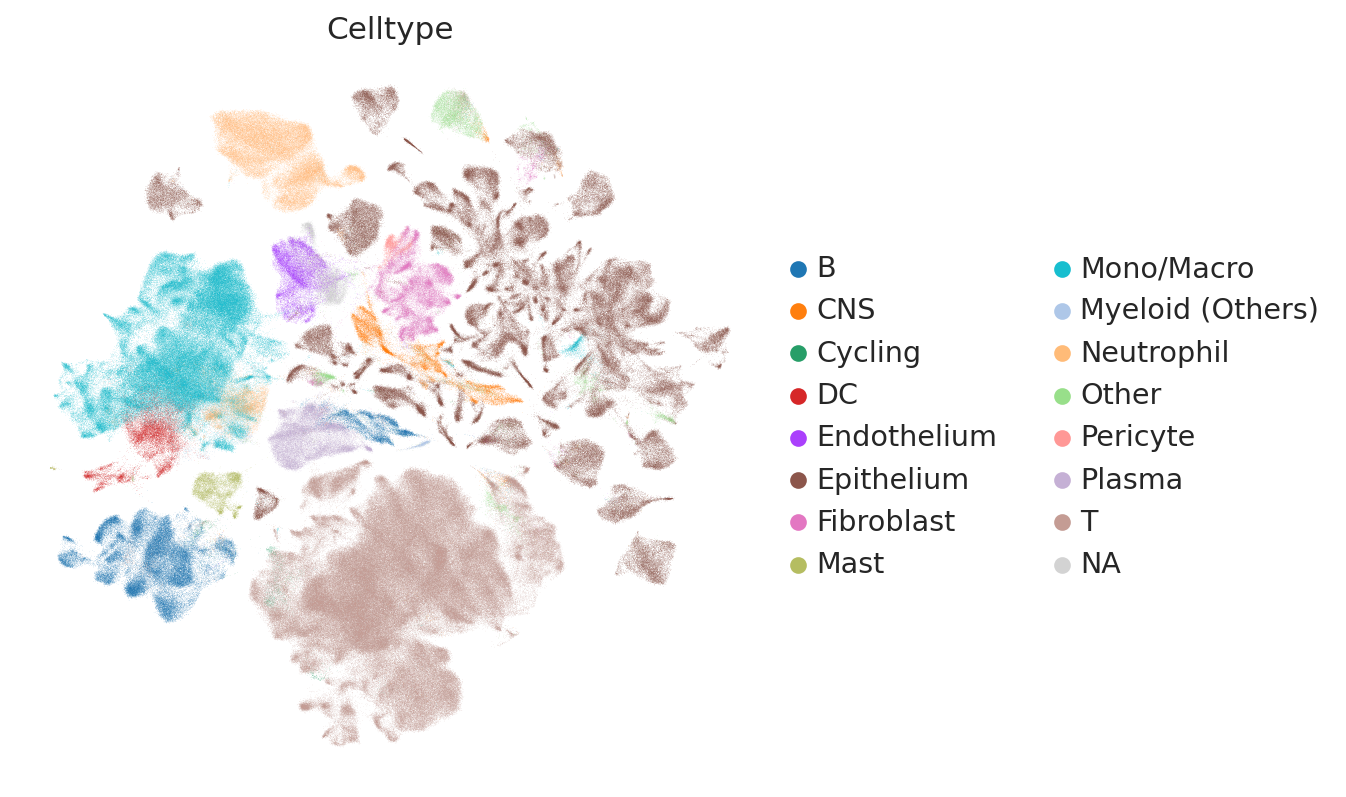

In [133]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sc.pl.umap(adata, color=["Celltype"])

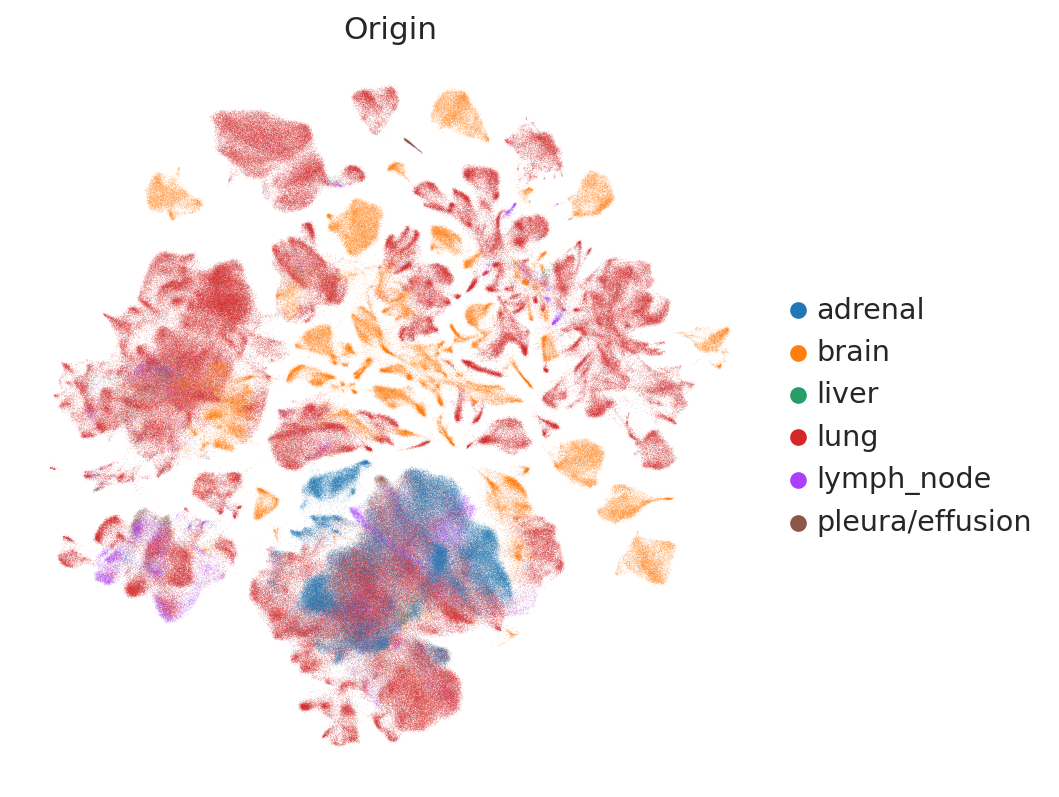

In [140]:
sc.pl.umap(adata, color=["Origin"])

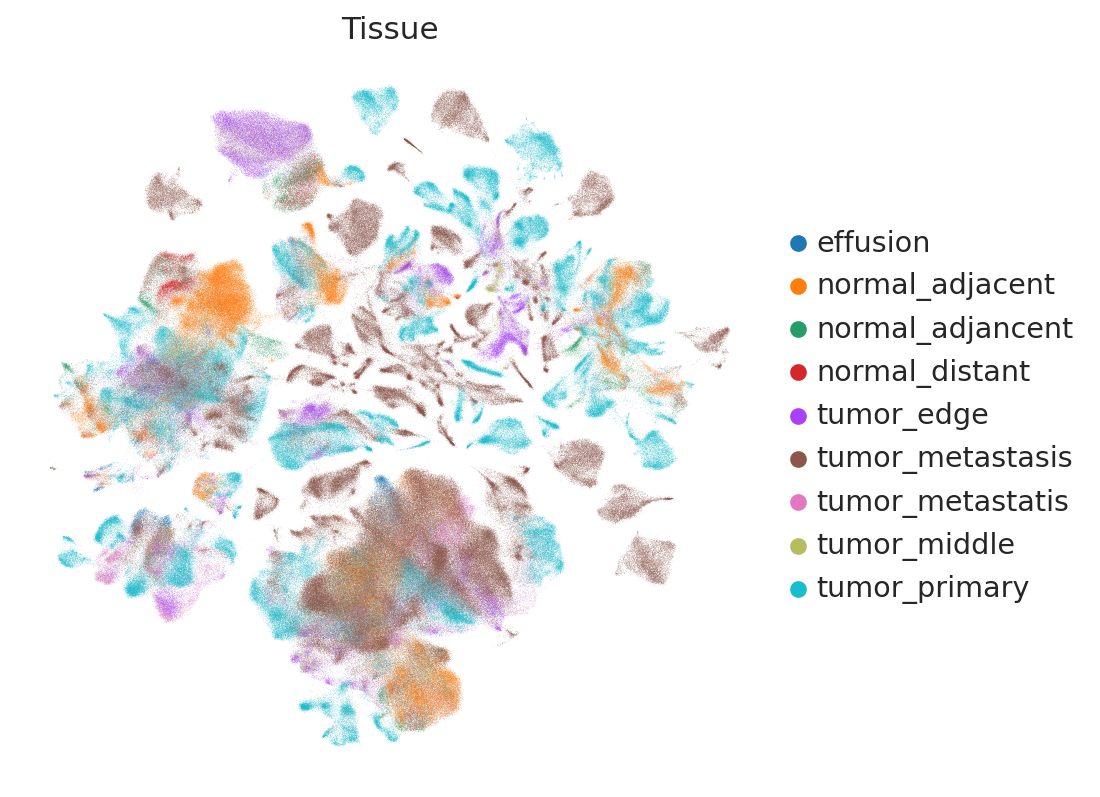

In [139]:
sc.pl.umap(adata, color=["Tissue"])

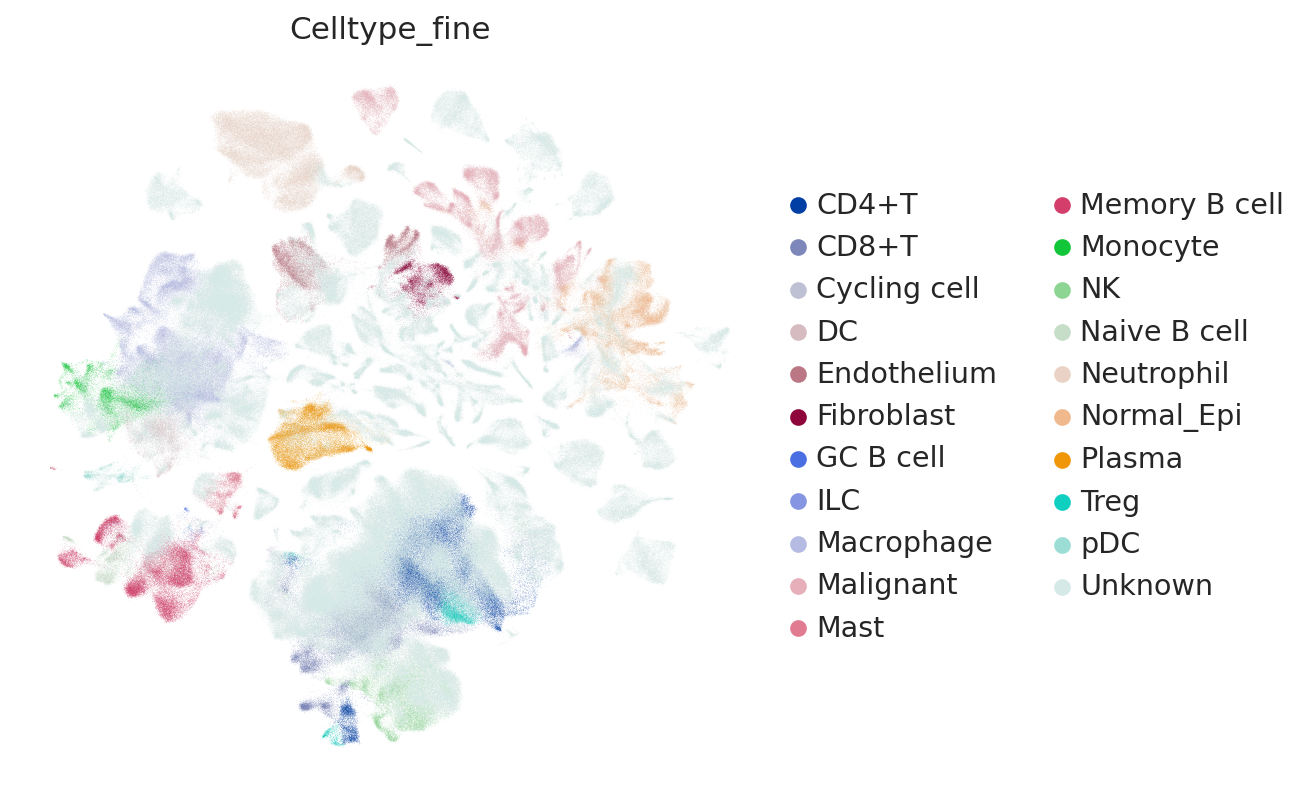

In [134]:
sc.pl.umap(adata, color=["Celltype_fine"])

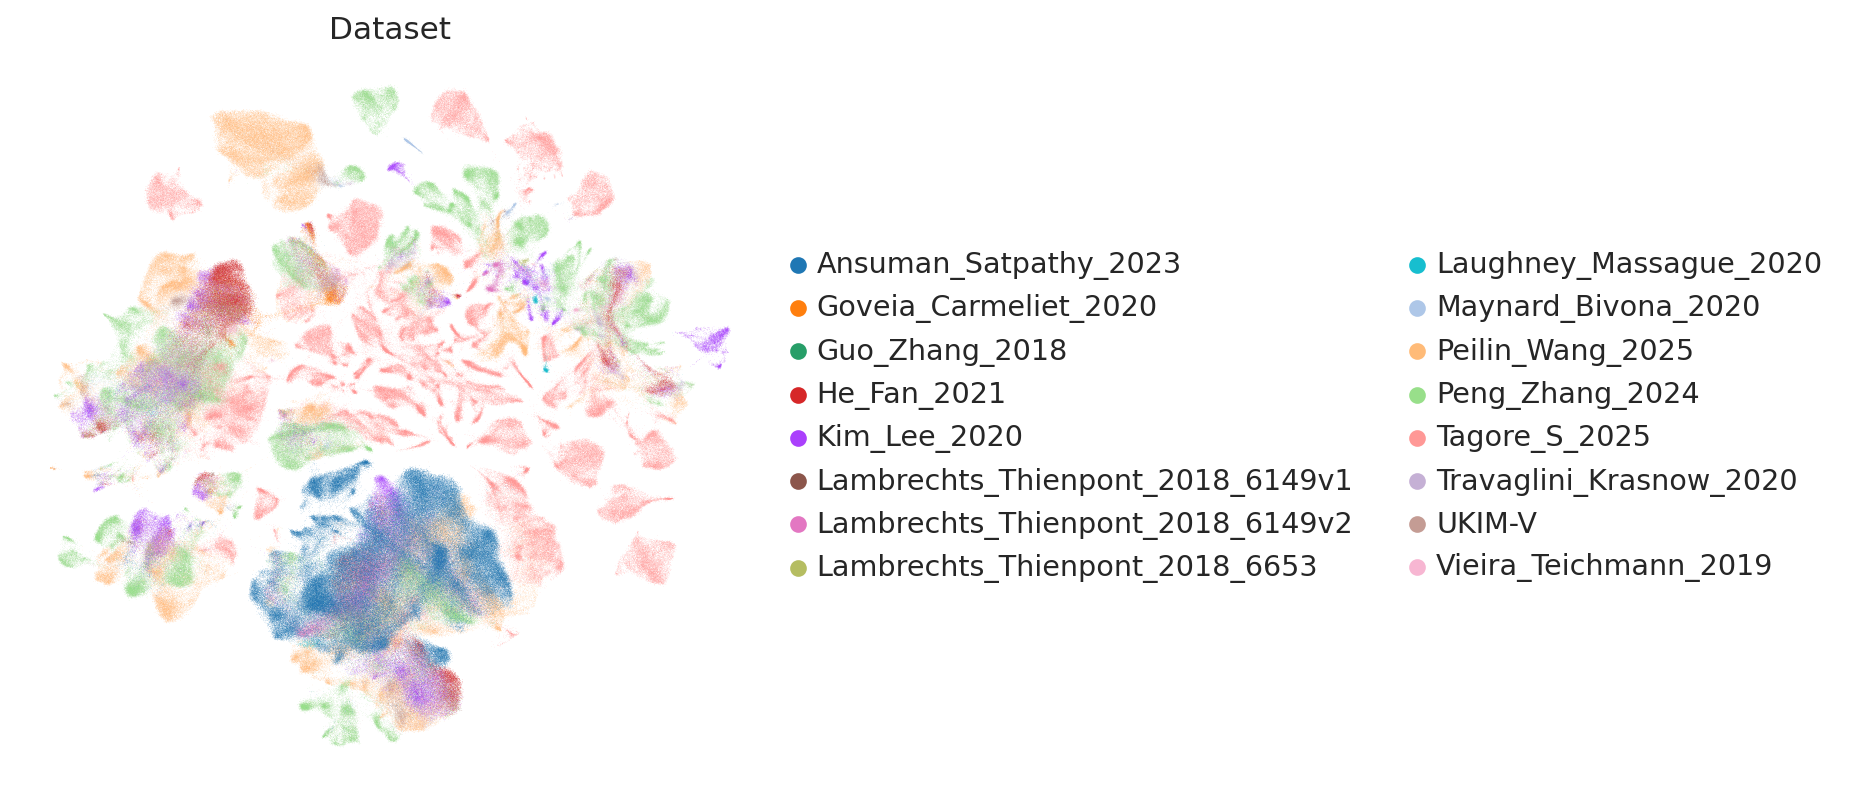

In [135]:
sc.pl.umap(adata, color=["Dataset"])

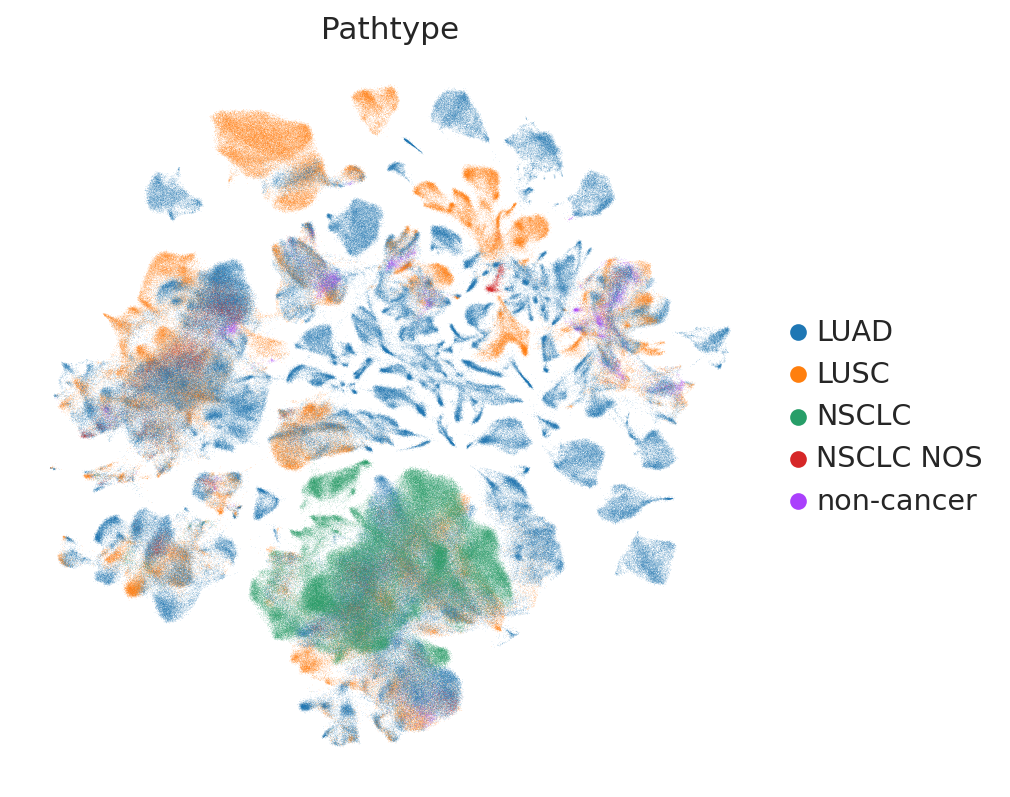

In [137]:
sc.pl.umap(adata, color=["Pathtype"])

In [ ]:
sc.pl.umap(adata, color=["Pathtype"])

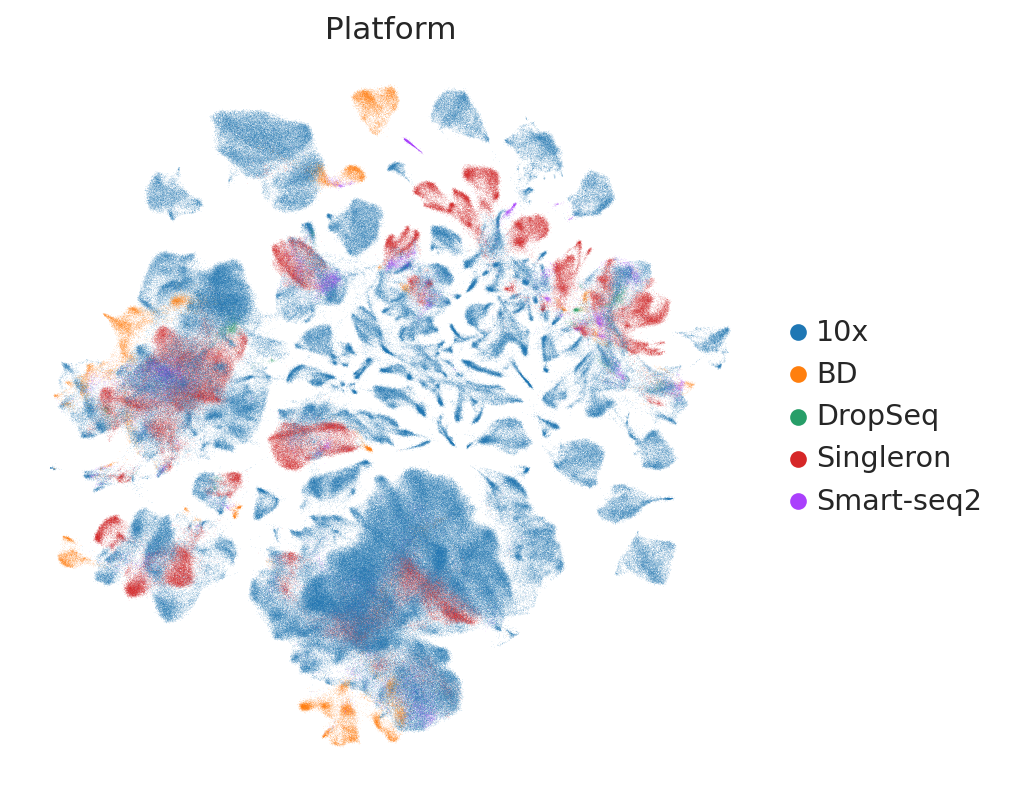

In [136]:
sc.pl.umap(adata, color=["Platform"])

In [141]:
adata.write_h5ad('/home/data/sdzl14/NSCLC/zong.first_inter.h5ad')

In [142]:
adata = adata.copy()
adata.raw = adata  # keep full dimension safe
print(f"Number of genes before HVG selection: {adata.n_vars}")
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=3000,
    batch_key="Dataset",
    subset=True,
)
print(f"Number of genes after HVG selection: {adata.n_vars}")

Number of genes before HVG selection: 16813

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:73: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Number of genes after HVG selection: 3000

In [143]:
scvi.model.SCVI.setup_anndata(adata, batch_key="Dataset",)
scvi_model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")
scvi_model.train(max_epochs=300)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.


Epoch 300/300: 100%|██████████| 300/300 [7:42:49<00:00, 93.48s/it, v_num=1, train_loss_step=782, train_loss_epoch=788]   

`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 300/300: 100%|██████████| 300/300 [7:42:49<00:00, 92.57s/it, v_num=1, train_loss_step=782, train_loss_epoch=788]


<Axes: xlabel='epoch'>

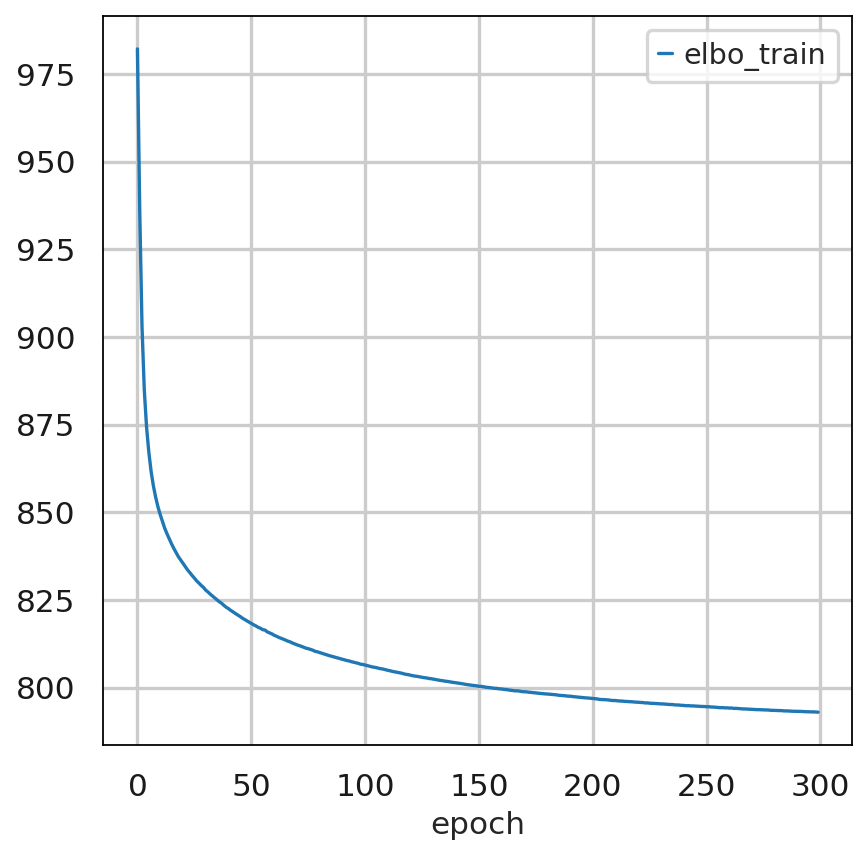

In [145]:
# 检查 scVI 训练历史
scvi_model.history["elbo_train"].plot()  # 确认损失下降至稳定值

In [146]:
# 检查数据中是否存在NaN或极端值
print("adata.X 中的NaN数量:", np.isnan(adata.X.data).sum())
print("adata.X 中的最大值:", adata.X.max())

adata.X 中的NaN数量: 0

adata.X 中的最大值: 6981040.0

In [149]:
print("CUDA 是否初始化:", torch.cuda.is_initialized())

CUDA 是否初始化: True

In [156]:
model_no_fix = scvi.model.SCANVI.from_scvi_model(
    scvi_model,
    adata=adata,
    labels_key="Celltype_fine",
    unlabeled_category="Unknown",
    classifier_parameters={"logits": False},
)
model_no_fix.train(max_epochs=7,
    batch_size=256,  # 增大批次大小（默认128）
    # 优化数据加载配置
    datasplitter_kwargs={
        "num_workers": 10,    # 根据CPU核心数调整（非必须151，建议4-32）
        "pin_memory": True    # 启用内存锁页（加速GPU传输）
    }, check_val_every_n_epoch=1
    
)

INFO     Training for 7 epochs.                                                                                    


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 7/7: 100%|██████████| 7/7 [14:20<00:00, 123.95s/it, v_num=1, train_loss_step=882, train_loss_epoch=864]

`Trainer.fit` stopped: `max_epochs=7` reached.


Epoch 7/7: 100%|██████████| 7/7 [14:20<00:00, 122.93s/it, v_num=1, train_loss_step=882, train_loss_epoch=864]


In [151]:
model_fix = scvi.model.SCANVI.from_scvi_model(
    scvi_model,
    adata=adata,
    labels_key="Celltype_fine",
    unlabeled_category="Unknown",
)
model_fix.train(max_epochs=7,
    batch_size=256,  # 增大批次大小（默认128）
    # 优化数据加载配置
    datasplitter_kwargs={
        "num_workers": 32,    # 根据CPU核心数调整（非必须151，建议4-32）
        "pin_memory": True    # 启用内存锁页（加速GPU传输）
    }, check_val_every_n_epoch=1)

INFO     Training for 7 epochs.                                                                                    


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 7/7: 100%|██████████| 7/7 [18:49<00:00, 165.87s/it, v_num=1, train_loss_step=740, train_loss_epoch=766]

`Trainer.fit` stopped: `max_epochs=7` reached.


Epoch 7/7: 100%|██████████| 7/7 [18:49<00:00, 161.34s/it, v_num=1, train_loss_step=740, train_loss_epoch=766]


In [152]:
model_fix_linear = scvi.model.SCANVI.from_scvi_model(
    scvi_model,
    adata=adata,
    labels_key="Celltype_fine",
    unlabeled_category="Unknown",
    linear_classifier=True,
)
model_fix_linear.train(max_epochs=7,
    batch_size=256,  # 增大批次大小（默认128）
    # 优化数据加载配置
    datasplitter_kwargs={
        "num_workers": 32,    # 根据CPU核心数调整（非必须151，建议4-32）
        "pin_memory": True    # 启用内存锁页（加速GPU传输）
    }, check_val_every_n_epoch=1)

INFO     Training for 7 epochs.                                                                                    


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 7/7: 100%|██████████| 7/7 [17:40<00:00, 153.01s/it, v_num=1, train_loss_step=742, train_loss_epoch=766]

`Trainer.fit` stopped: `max_epochs=7` reached.


Epoch 7/7: 100%|██████████| 7/7 [17:40<00:00, 151.49s/it, v_num=1, train_loss_step=742, train_loss_epoch=766]


In [3]:
import matplotlib.pyplot as plt

In [157]:
def plot_classification_metrics(
    model_no_fix: scvi.model.SCANVI,
    model_fix: scvi.model.SCANVI,
    model_fix_linear: scvi.model.SCANVI,
):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 9), sharey=False, sharex=True)

    def plot_metric(ax, metric, model, title, ylim, lw=1.25):
        ax.plot(
            model.history[f"train_{metric}"],
            label="train",
            color="darkgreen",
            linewidth=lw,
        )
        ax.plot(
            model.history[f"validation_{metric}"],
            label="validation",
            color="firebrick",
            linewidth=lw,
        )
        ax.set_ylim(ylim)
        ax.legend()
        ax.set_title(title)

    metrics = ["classification_loss", "calibration_error", "accuracy"]
    ylims = [(-0.1, 2.3), (-0.01, 0.18), (0.8, 1.0)]
    models = [model_no_fix, model_fix, model_fix_linear]
    model_names = ["No fix", "Fix", "Fix linear"]

    for i, (metric, ylim) in enumerate(zip(metrics, ylims, strict=False)):
        for j, (model, model_name) in enumerate(zip(models, model_names, strict=False)):
            plot_metric(axes[i, j], metric, model, model_name, ylim=ylim)

    fig.text(-0.01, 0.8, "Classification loss", va="center", rotation="vertical")
    fig.text(-0.01, 0.5, "Calibration error", va="center", rotation="vertical")
    fig.text(-0.01, 0.2, "Accuracy", va="center", rotation="vertical")
    fig.text(0.5, -0.01, "Epoch", ha="center")
    fig.tight_layout()

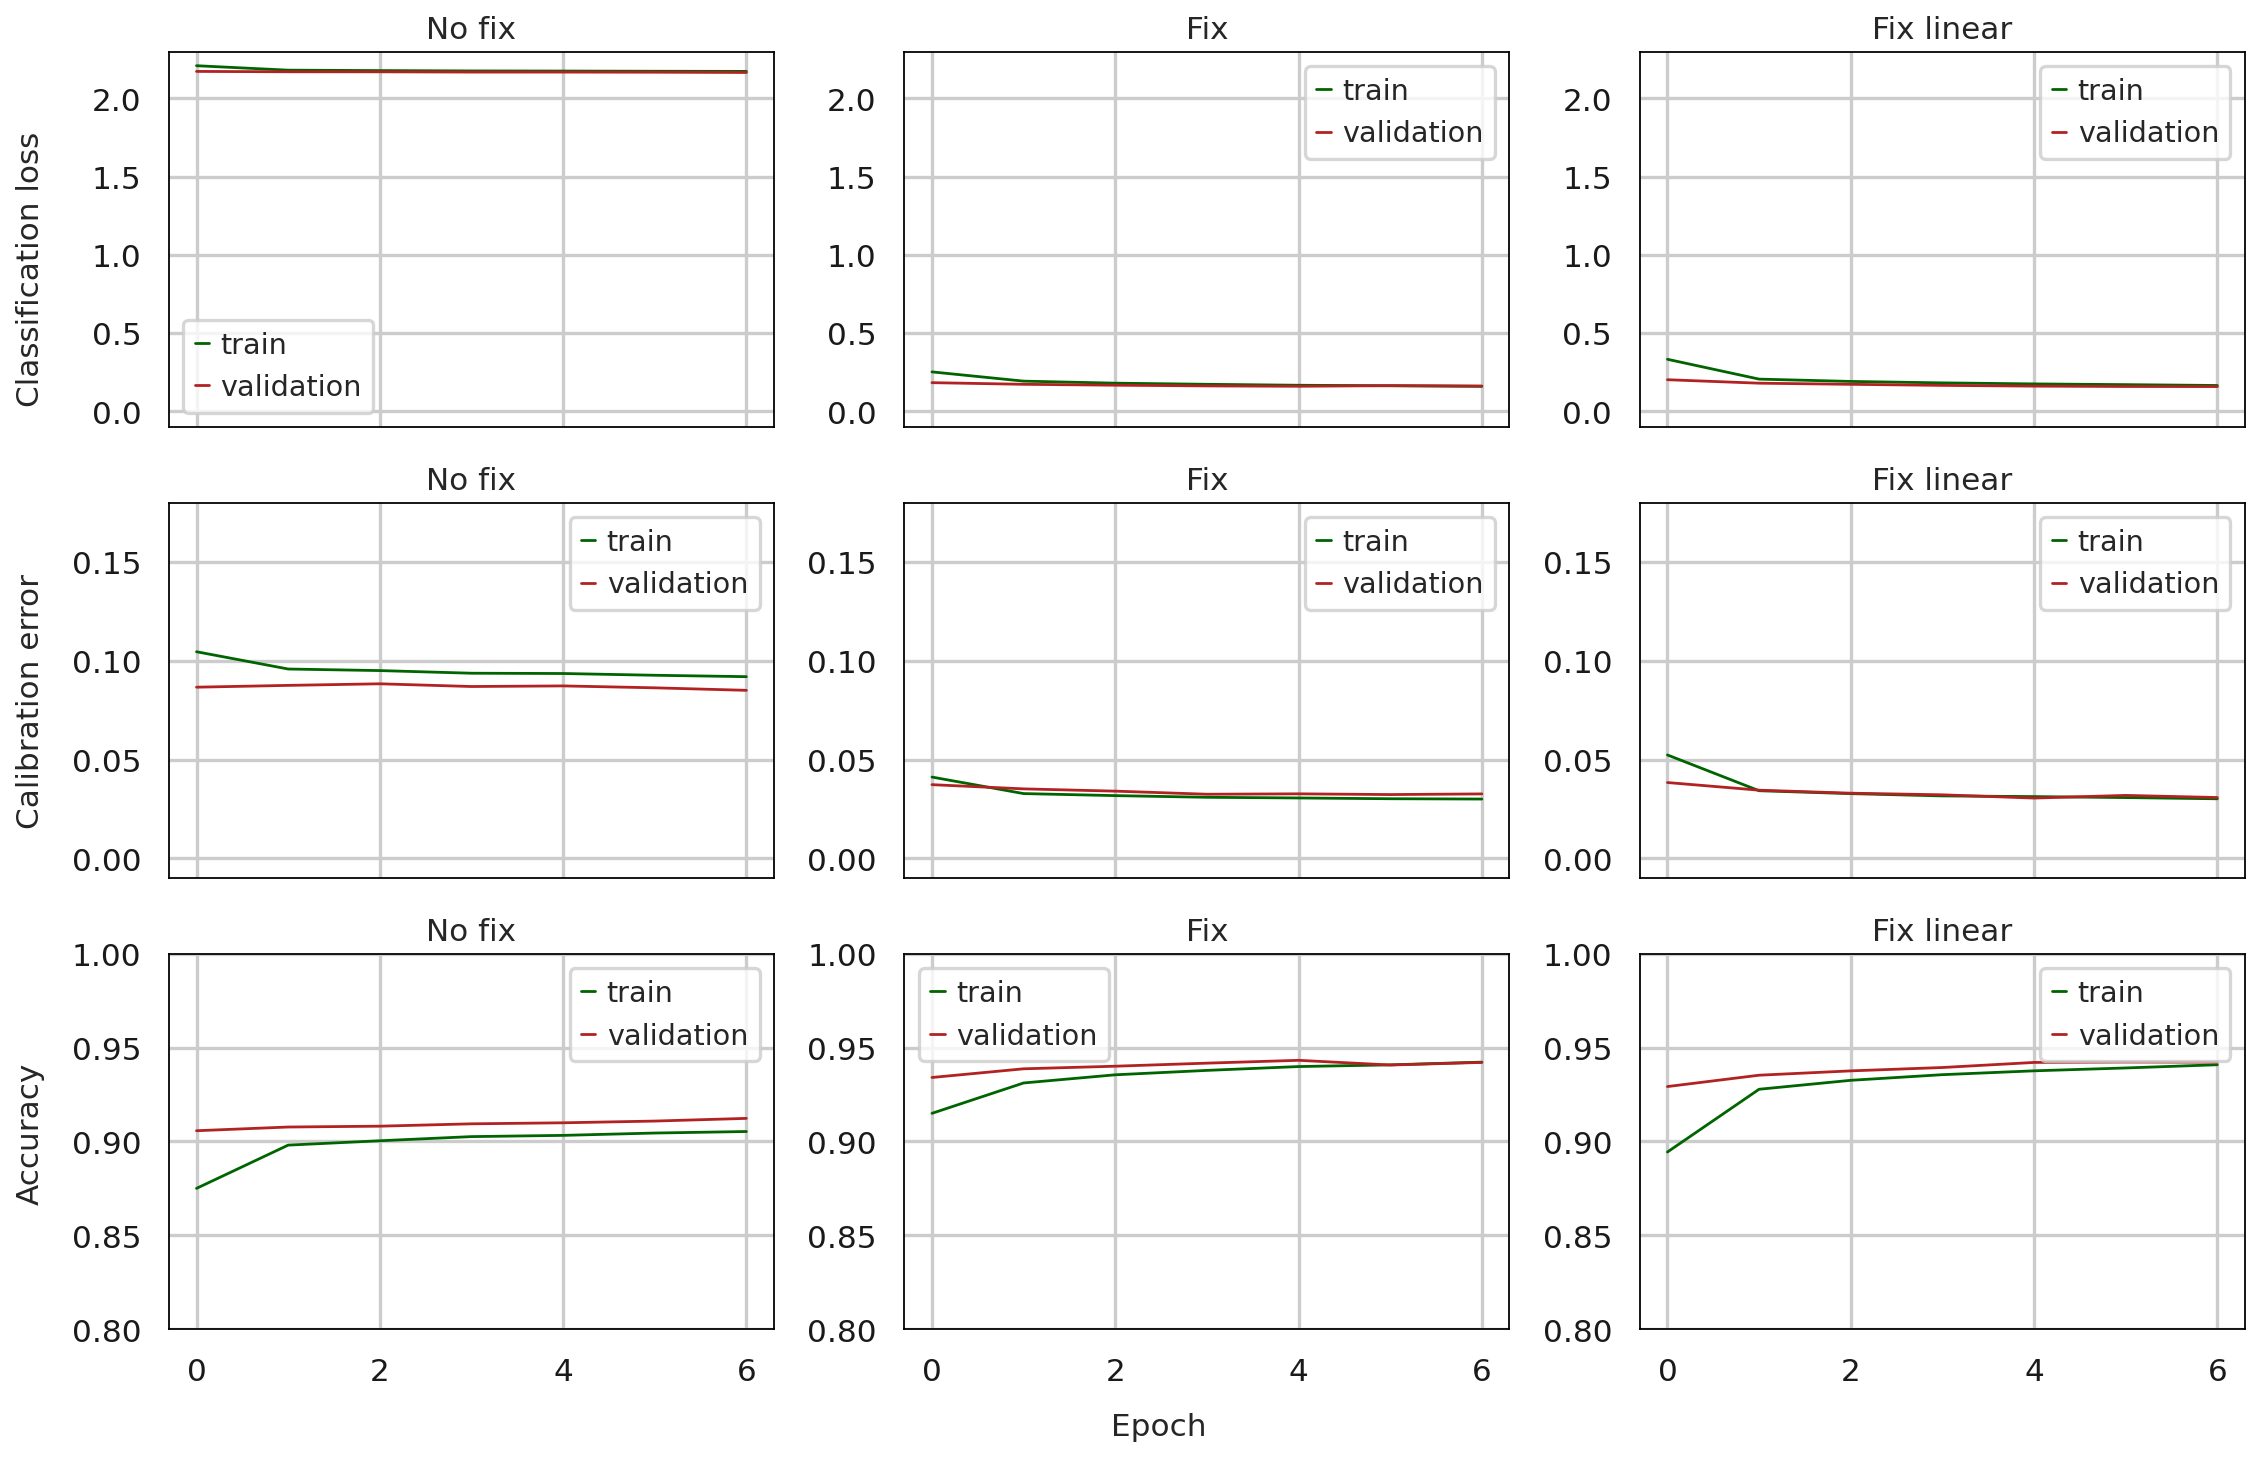

In [158]:
plot_classification_metrics(model_no_fix, model_fix, model_fix_linear)

In [159]:
def plot_confusion_matrices(
    model_no_fix: scvi.model.SCANVI,
    model_fix: scvi.model.SCANVI,
    model_fix_linear: scvi.model.SCANVI,
    subset: str | None = None,
    prediction_key: str = "_prediction",
    labels_key: str = "Celltype_fine",
):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6.375), sharey=False, sharex=False)

    def plot_confusion_matrix(ax, model, title, subset):
        adata = model.adata
        adata.obs[prediction_key] = model.predict()

        if subset == "validation":
            adata = adata[model.validation_indices].copy()
        elif subset == "train":
            adata = adata[model.train_indices].copy()

        df = adata.obs.groupby([labels_key, prediction_key]).size().unstack(fill_value=0)
        conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

        _ = ax.pcolor(conf_mat, cmap="cividis", vmin=0, vmax=1)
        _ = ax.set_xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
        _ = ax.set_yticks(np.arange(0.5, len(df.index), 1), df.index)
        ax.set_title(title)

    models = [model_no_fix, model_fix, model_fix_linear]
    model_names = ["No fix", "Fix", "Fix linear"]

    for model, model_name, ax in zip(models, model_names, axes, strict=False):
        plot_confusion_matrix(ax, model, model_name, subset)

    fig.text(0.0, 0.5, "Observed", va="center", rotation="vertical")
    fig.text(0.5, 0.0, "Predicted", ha="center")
    fig.tight_layout()

/tmp/ipykernel_2222310/2549768501.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = adata.obs.groupby([labels_key, prediction_key]).size().unstack(fill_value=0)
/tmp/ipykernel_2222310/2549768501.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = adata.obs.groupby([labels_key, prediction_key]).size().unstack(fill_value=0)
/tmp/ipykernel_2222310/2549768501.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

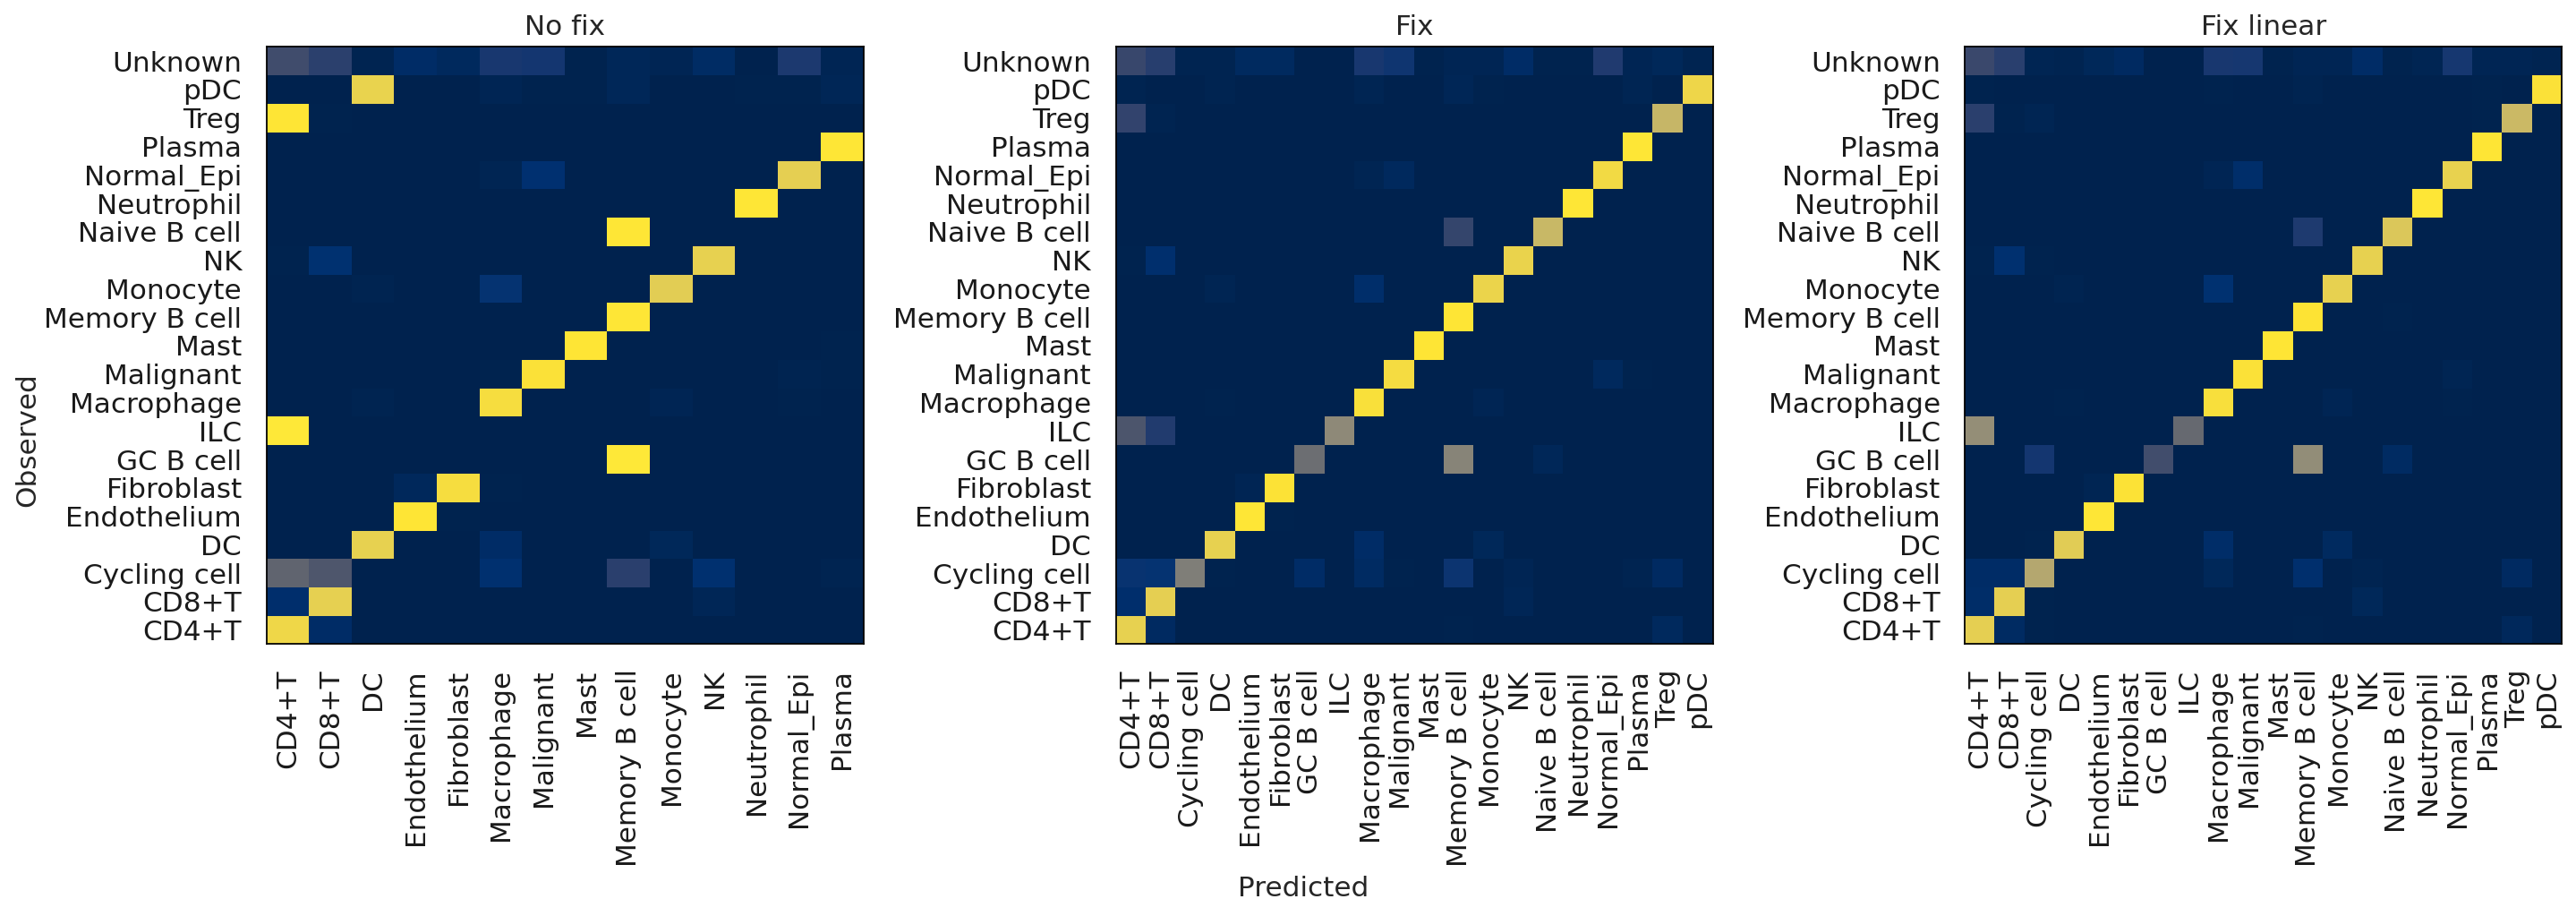

In [160]:
plot_confusion_matrices(model_no_fix, model_fix, model_fix_linear, subset="validation")

In [170]:
X_SCVI_KEY = "X_scvi"
X_SCANVI_NO_FIX_KEY = "X_scanvi_no_fix"
X_SCANVI_FIX_KEY = "X_scanvi_fix"
X_SCANVI_FIX_LINEAR_KEY = "X_scanvi_fix_linear"

adata.obsm[X_SCVI_KEY] = scvi_model.get_latent_representation()
adata.obsm[X_SCANVI_NO_FIX_KEY] = model_no_fix.get_latent_representation()
adata.obsm[X_SCANVI_FIX_KEY] = model_fix.get_latent_representation()
adata.obsm[X_SCANVI_FIX_LINEAR_KEY] = model_fix_linear.get_latent_representation()

In [163]:
def plot_latent_umaps(
    model_no_fix: scvi.model.SCANVI,
    model_fix: scvi.model.SCANVI,
    model_fix_linear: scvi.model.SCANVI,
    color: list | str | None = None,
    subset: str | None = None,
    latent_key: str = "_latent",
):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 3), sharey=False, sharex=False)

    def plot_latent_umap(ax, model, title, subset, legend_loc):
        adata = model.adata
        adata.obsm[latent_key] = model.get_latent_representation()
        sc.pp.neighbors(adata, use_rep=latent_key)

        if subset == "validation":
            adata = model.adata[model.validation_indices].copy()
        elif subset == "train":
            adata = model.adata[model.train_indices].copy()

        sc.tl.umap(adata, min_dist=0.3)
        sc.pl.umap(
            adata,
            color=color,
            frameon=False,
            ncols=1,
            ax=ax,
            show=False,
            legend_loc=legend_loc,
        )
        ax.set_title(title)

    models = [model_no_fix, model_fix, model_fix_linear]
    model_names = ["No fix", "Fix", "Fix linear"]
    legend_loc = ["none", "none", "right margin"]

    for model, model_name, ax, leg_loc in zip(models, model_names, axes, legend_loc, strict=False):
        plot_latent_umap(ax, model, model_name, subset, leg_loc)

    fig.text(0.0, 0.5, "UMAP_2", va="center", rotation="vertical")
    fig.text(0.5, 0.0, "UMAP_1", ha="center")
    fig.tight_layout()

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


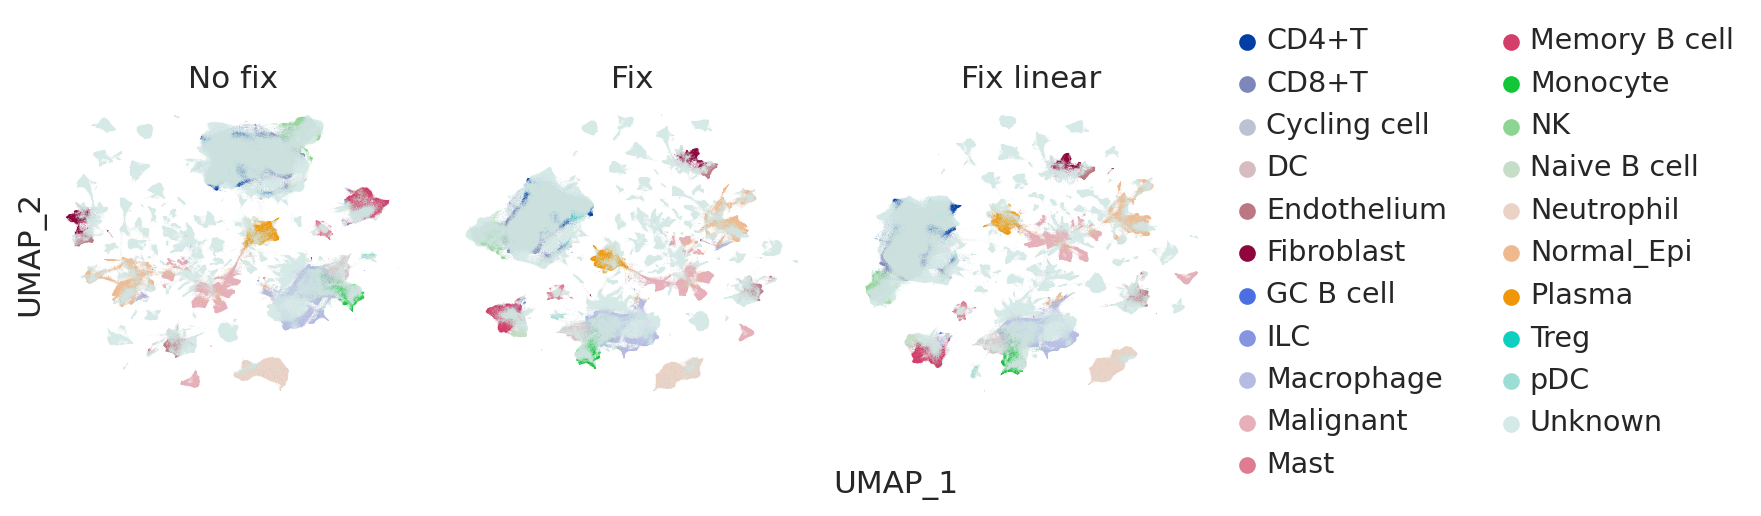

In [164]:
plot_latent_umaps(model_no_fix, model_fix, model_fix_linear, color="Celltype_fine")

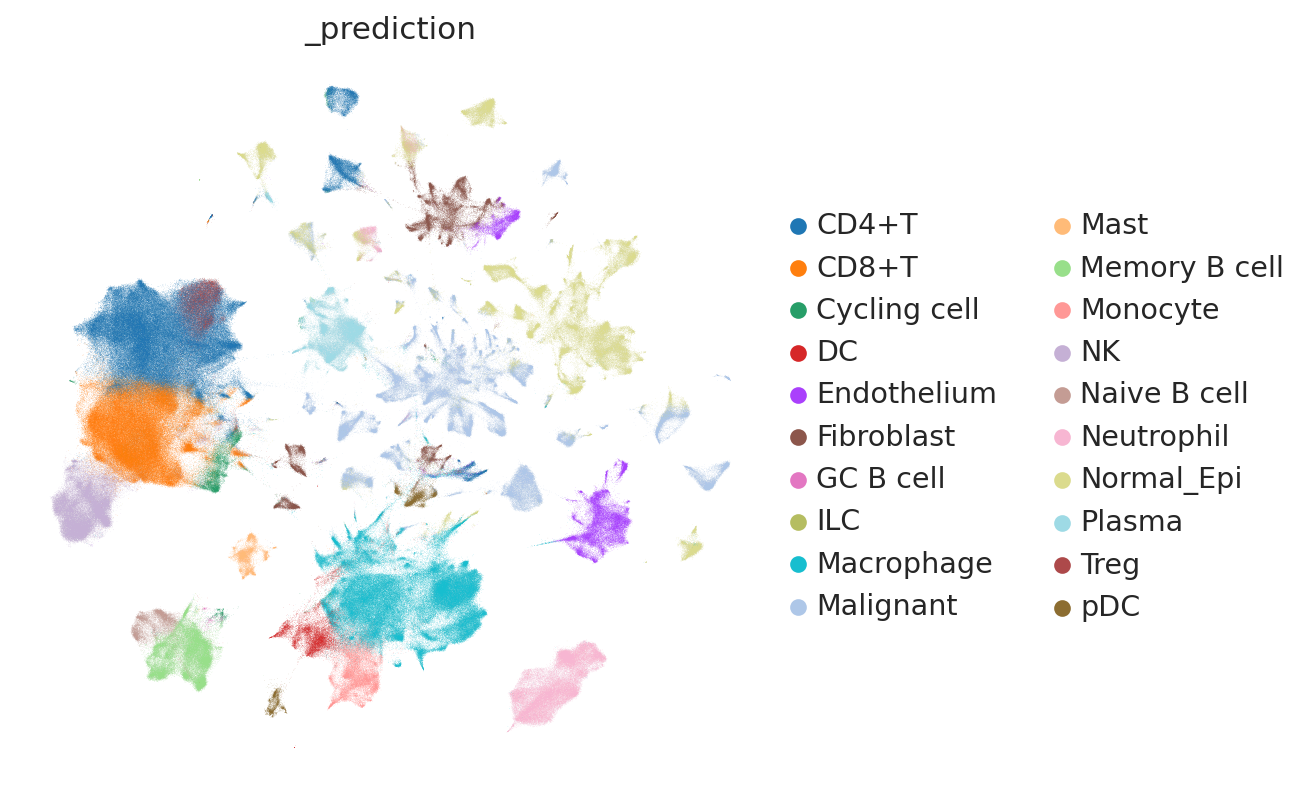

In [166]:
sc.pl.umap(adata, color='_prediction')

In [5]:
adata

NameError: name 'adata' is not defined

In [4]:
from scib import metrics
from scib_metrics.benchmark import Benchmarker

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [176]:



# 初始化 Benchmarker
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="Celltype_fine",
    embedding_obsm_keys=[
        "X_pca",
        X_SCVI_KEY,
        X_SCANVI_NO_FIX_KEY,
        X_SCANVI_FIX_KEY,
        X_SCANVI_FIX_LINEAR_KEY,
    ],
    n_jobs=-1
)

# 运行评估
bm.benchmark()

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:438: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
Computing neighbors:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
bm.plot_results_table(min_max_scale=False)

In [168]:
adata.write_h5ad("/home/data/sdzl14/NSCLC/zong/second.scANVI_adata.h5ad")

In [6]:
adata = sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/second.scANVI_adata.h5ad')
adata = adata.copy()

In [2]:
import jax

ModuleNotFoundError: No module named 'jax._src.numpy.lax_numpy'

In [2]:

from scib_metrics.nearest_neighbors import NeighborsResults


ImportError: cannot import name 'NeighborsResults' from 'scib_metrics.nearest_neighbors' (/home/data/sdzl14/anaconda3/envs/pycaret/lib/python3.8/site-packages/scib_metrics/nearest_neighbors/__init__.py)

In [5]:
import numpy as np
print(np.__version__)

1.24.3


In [7]:
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection

In [ ]:
import faiss

from scib_metrics.nearest_neighbors import NeighborsOutput

In [12]:



def faiss_hnsw_nn(X: np.ndarray, k: int):
    """Gpu HNSW nearest neighbor search using faiss.

    See https://github.com/nmslib/hnswlib/blob/master/ALGO_PARAMS.md
    for index param details.
    """
    X = np.ascontiguousarray(X, dtype=np.float32)
    res = faiss.StandardGpuResources()
    M = 32
    index = faiss.IndexHNSWFlat(X.shape[1], M, faiss.METRIC_L2)
    gpu_index = faiss.index_cpu_to_gpu(res, 0, index)
    gpu_index.add(X)
    distances, indices = gpu_index.search(X, k)
    del index
    del gpu_index
    # distances are squared
    return NeighborsOutput(indices=indices, distances=np.sqrt(distances))


def faiss_brute_force_nn(X: np.ndarray, k: int):
    """Gpu brute force nearest neighbor search using faiss."""
    X = np.ascontiguousarray(X, dtype=np.float32)
    res = faiss.StandardGpuResources()
    index = faiss.IndexFlatL2(X.shape[1])
    gpu_index = faiss.index_cpu_to_gpu(res, 0, index)
    gpu_index.add(X)
    distances, indices = gpu_index.search(X, k)
    del index
    del gpu_index
    # distances are squared
    return NeighborsOutput(indices=indices, distances=np.sqrt(distances))

In [13]:
adata = sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/second.scANVI_adata.h5ad')
adata = adata.copy()

In [15]:
sc.tl.pca(adata)

In [ ]:
import time
X_SCVI_KEY = "X_scvi"
X_SCANVI_NO_FIX_KEY = "X_scanvi_no_fix"
X_SCANVI_FIX_KEY = "X_scanvi_fix"
X_SCANVI_FIX_LINEAR_KEY = "X_scanvi_fix_linear"
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

biocons = BioConservation(isolated_labels=False)

start = time.time()
bm = Benchmarker(
    adata,
    batch_key="Dataset",
    label_key="Celltype_fine",
    embedding_obsm_keys=[
        "X_pca",
        X_SCVI_KEY,
        X_SCANVI_NO_FIX_KEY,
        X_SCANVI_FIX_KEY,
        X_SCANVI_FIX_LINEAR_KEY,
    ],
    n_jobs=20,
)
bm.benchmark()
bm.prepare(neighbor_computer=faiss_brute_force_nn)
bm.benchmark()
end = time.time()
print(f"Time: {int((end - start) / 60)} min {int((end - start) % 60)} sec")

Embeddings:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
import scanpy as sc

AttributeError: module 'numba.core.utils' has no attribute 'cached_property'

In [ ]:
bm.plot_results_table()

In [ ]:
bm.plot_results_table(min_max_scale=False)

In [ ]:
from rich import print

df = bm.get_results(min_max_scale=False)
print(df)